In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df = pd.read_csv('Downloads/Salary_dataset.csv', on_bad_lines='warn', sep=',')
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [19]:
df = df.drop('Unnamed: 0', axis=1)

X = df[['YearsExperience']]
y = df['Salary']

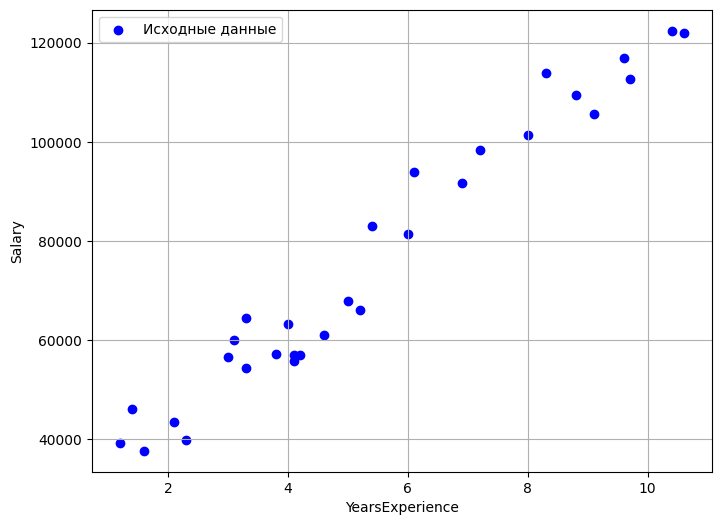

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', label='Исходные данные')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

r2_1 = r2_score(y, y_pred)
print(f"R-squared: {r2_1}")

R-squared: 0.9569566641435086


In [22]:
df['Predicted_salary'] = y_pred

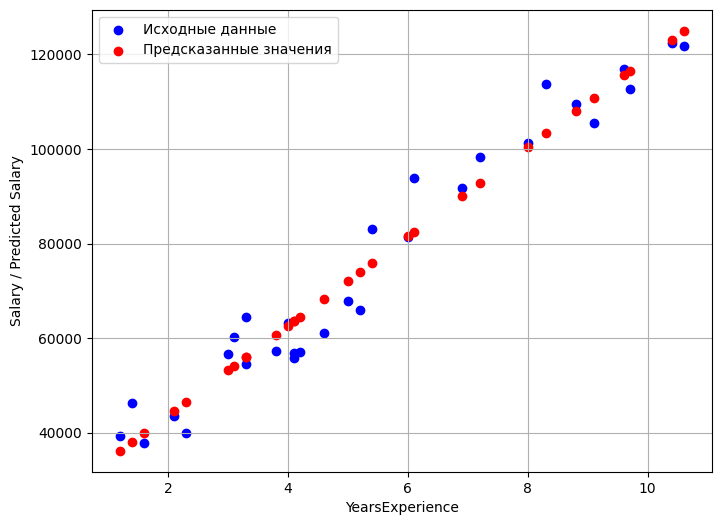

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', label='Исходные данные')
plt.scatter(df['YearsExperience'], y_pred, color='red', label='Предсказанные значения')
plt.xlabel('YearsExperience')
plt.ylabel('Salary / Predicted Salary')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Создаем столбец с рандомными данными
random_numbers = np.random.rand(30)
df['random_data'] = random_numbers
display(df.head())

,YearsExperience,Salary,Predicted_salary,random_data
0,1.2,39344.0,36188.158752,0.780188
1,1.4,46206.0,38078.151217,0.844644
2,1.6,37732.0,39968.143681,0.439963
3,2.1,43526.0,44693.124842,0.314250
4,2.3,39892.0,46583.117306,0.573226


In [32]:
# Обучаем новую модель с учетом рандомного столбца
X = df[['YearsExperience', 'random_data']]
y = df['Salary']
model_2 = LinearRegression()
model_2.fit(X, y)
y_pred_2 = model_2.predict(X)
r2_2 = r2_score(y, y_pred_2)
print(f"R-squared with random data: {r2_2}")

R-squared with random data: 0.9583552806630944
